# Price experiments

We discussed before that using pricing experiments to infer demand aggregate curves can be very costly to firms. This is due to randomness of choosing prices leading to lost potential profits. 

One of the great aspects of practicing marketing in a digital world is that pricing (or any other marketing lever) can often be customized to individual consumers. In this way, we are able to conduct experiments with much lower costs - we don't have to change prices for everyone, just some individuals.

The problem, however, is how the marketer can infer demand functions for their profit maximization problems using individual data. When we were considering price experiments at the aggregate level, the fundamental observation recorded is a price and sales pair. This has a very natural demand-function interpretation. When we run price experiments for each individual, we end up with observations of price and purchase decision (whether one specific person bought). The interpretation of this data as a demand function here is not so straightforward.

In order to interpret purchase/no purchase decisions, we need to develop some economic theory.

# Starting from preferences

One of the fundamental assumptions of economics is that consumers are rational. This means:

1. Consumers have complete preferences.
2. Consumer preferences are transitive.

Complete preference means that given any 2 pairs of products (A,B), the consumer is able to determine which she prefers and/or is indifferent between. The preference relation notation is as follows:

1. $\succsim$ means weak preference (could be indifferent)
2. $\succ$ means strong preference (cannot be indifferent)
3. $\sim$ means indifferent

Transitive preference means: given that consumer prefers A to B ($A\succsim B$) and she also preferes B to C ($B\succsim C$), then a rational consumer must prefer A to C ($A\succsim C$).

Given that there are rational preferences, we can show that there exists utility functions that represent these preferences, or the mathematically equivalent statement below: 

$$\text{Given some finite set of choice considerations $X$ } \exists u: x\rightarrow \mathbb{R}, \text{s.t. } x\succsim y \iff u(x)\ge u(y), \forall(x,y)\in X$$

**Proof:**
This is a proof by construction. We first show that we can construct one specific utility function, and then show that this utility function implies the underlying preferences.

Let our utilty function, $u$, be simply the cardinality of the no better than set, $NBT$:

$$NBT(x)=\{y\in X s.t. x \succsim y\}$$

$$u(x)=\|{NBT(x)}\|$$

In other words, if $x$ is the most preferred element of set $X$ which has 100 elements, then the $u(x)=99$. Similarly, if x is the least preferred element of set $X$, then $u(x)=0$.

Next, we just need to show that this utility function infers the same preference relations, i.e. show $u(x)\ge u(y)\implies x\succsim y$.

Suppose this is not the case, i.e. $\exists x,y \text{ s.t. } u(x)> u(y) \text{ and } y\succsim x$. Since $y\succsim x$, it must be the case that $x\in NBT(y)$. 

If $y\succ x$, then $NBT(y)$ contains $x$ while $NBT(x)$ does not contain $y$. Moreover, if $x'\in NBT(x)\implies x'\in NBT(y)$ by transitivity. Additionally, $y \notin NBT(x)$. Therefore, $u(y)\ge u(x)+1$. $\Rightarrow\Leftarrow$ (that means contradiction)

**Note** there are infinite number of utility functions for which any set of preferences can be represented. Ex. Any translations of the utility function above works. This means that it's not so important what the value of utility functions yield, as long as the order is preserved.

# From utility functions to utility maxmization

Rather than working with preferences, we are able to work with utility functions. Utility functions allow us to formalize mathematically rational consumer behavior.

Let $U(\cdot)$ be a utility function. The consumer's problem is:

$$Max_{x}u(x)$$
$$\text{s.t. }p\cdot x\le W$$

Where $x$ is a vector of choice quantities $x=\{x_1,x_2,...,x_n\}$, p is the vector set of unit prices $p=\{p_1, p_2, ...,p_n\}$ and $p\cdot x$ is the dot product, $\sum_{i}x_ip_i$.

We won't go in too much detail about deriving properties of utility maximizing consumers, you can learn that in a graduate microeconomics course.

# Putting the random in utility maximization

One thing that one may ask is, if consumers are rational, why do we ever make different choices given the same choice set?

The short answer is, we are never really given the same choice set.

There is always something different about each situation. Maybe it's the time, place, weather, mood, etc...

Economists model these "unobserved" differences by purchase occassion by allowing utility functions to have a random component. In other words, the deterministic component of a utility function only represents the expected utility. The function also includes a random "shock" to the utility function that will alter the observed revealed preference. 

**This way of thinking about consumers is called random utility maximization, or RUM.**

The typical formulation of the utility function describes choices by a set of defining characteristics. Let's call these $x$. This is similar to the bundle of goods in utility maximization problem. You can think of purchasing a bundle of goods as purchasing a bundle of product characteristics. We can write this typical utility function as consumer i's utility for product j below:

$$U(x_{i,j})=x_j\beta+\epsilon_{i,j}$$

The consumer therefore maximizes her utility by picking the product $j$ such that:

$$U_{i,j}>U_{i,k}\forall k\neq j$$

Therefore the probability of picking product $j$ is:
$$Pr(x_j\beta+\epsilon_{i,j}>x_k\beta+\epsilon_{i,k})$$

Equivalently,
$$Pr(x_j\beta-x_k\beta>\epsilon_{i,k}-\epsilon_{i,j})$$

So if errors are independently and identically distributed, we just need the proportion of the time that the first of these 2 randomly drawn random numbers are greater than the other.

# The binary case.

Consider the binary choice case. In this scenario you have only to make one choice, to take or not to take a particular action. Think of this in our application as whether or not to buy. Let's further assume that the only difference between consumers is the prices that they see. We assume that consumers are in expectation the same (think of this as having a uniform target audience for your price experiment).

$$U(p_{i})=\beta_0+\beta p_i+\epsilon_{i}$$

We can normalize their utility for not buying to be 0 (remember only the cardinality of utility matters). 

Consumer buys when:
$$\beta_0+\beta p_i>0$$

Otherwise, the consumer does not buy.

The generated dataset will have whether or not each consumer bought (1 for buying 0 for not), the price they were shown. We can also include demographic variables to control for observed heterogeneity if available, these would be treated just as price is treated.

The last piece of the puzzle we need is to make an assumption about the distribution of the error. Because of mathematical convenience, this is typically assumed to be distributed logistically, hence the term logistic regression- or simply "logit." If we assume a random normal error, we get a probit. The problem with probit is that the estimation is more difficult - there is no "closed form solution." You can learn about this in your graduate econometrics course.

Binary logit case, the probability of observing a purchase would be:

$$Pr(U_i>0)=\frac{1}{1+e^{-(\beta_0+\beta p_i)}}$$

We will omit the derivation of the maximul likelihood estimation of the binary logit for this class. But the idea is we want to choose a $\beta$ that maximizes the joint probability of observing all of our consumer choices.

# How to run binary Logit in Python

In [1]:
#### Let's first simulate some logit choice data
## experimental prices
import numpy as np, pandas as pd
% matplotlib inline
from matplotlib import pyplot as plt

samplesize = 1000
prices = np.random.randint(13,23, size = samplesize)
epsilon = np.random.logistic(loc=0.0, scale=1.0, size=samplesize)
beta1 = -.6
beta0 = 10
utilities = beta0+beta1*prices+epsilon
choices = [int((np.sign(u)+1)/2) for u in utilities]

(array([  4.,  11.,  34., 116., 250., 305., 209.,  51.,  15.,   5.]),
 array([-7.01313107, -5.69328966, -4.37344825, -3.05360684, -1.73376543,
        -0.41392402,  0.9059174 ,  2.22575881,  3.54560022,  4.86544163,
         6.18528304]),
 <a list of 10 Patch objects>)

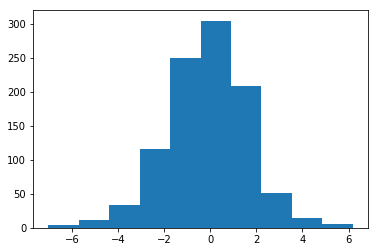

In [2]:
# This is what the logistic shocks looks like as a distribution
plt.hist(epsilon)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 423.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

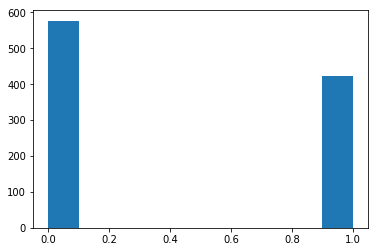

In [3]:
# choices
plt.hist(choices)

In [4]:
df = pd.DataFrame(zip(prices, choices), columns = ['Price', 'Buy'])
crosstab = pd.crosstab(df.Price, df.Buy)
crosstab

Buy,0,1
Price,,
13,11,98
14,16,86
15,34,64
16,31,52
17,54,43
18,64,42
19,96,15
20,81,14
21,97,2


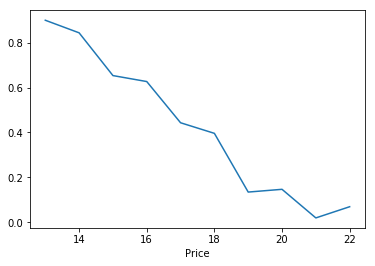

In [5]:
from __future__ import division
crosstab['prob_buy'] = crosstab.apply(lambda x: x[1]/(x[1]+x[0]), axis = 1)
crosstab['prob_buy'].plot()

In [6]:
# estimating the logit
from scipy import stats # you may or may not need the first 2 lines
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) # you may or may not need this
import statsmodels.api as sm
results = sm.Logit(df.Buy, sm.add_constant(df.Price)).fit()

C:\Users\Yang\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.463393
         Iterations 6


In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Buy   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Apr 2018   Pseudo R-squ.:                  0.3198
Time:                        18:09:31   Log-Likelihood:                -463.39
converged:                       True   LL-Null:                       -681.24
                                        LLR p-value:                 9.347e-97
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7840      0.611     16.021      0.000       8.587      10.981
Price         -0.5880      0.036    -16.453      0.000      -0.658      -0.518
==============================================================================
"""

In [8]:
# we can't really direclty interpret price prediction
# marginal effects gets us the change in probability of purchasing per change 
# in dollar price at the average price charged
mfx = results.get_margeff()
mfx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                    Buy
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0880      0.002    -52.068      0.000      -0.091      -0.085
==============================================================================
"""

In [9]:
# Compute predicted probabilities of purchasing by price level
predicted_prob = pd.DataFrame(zip(df.Price.unique(), results.predict(sm.add_constant(df.Price.unique()))), columns = ['Price', 'Prob'])
# Merge with actual purchase probability from data
predicted_prob = predicted_prob.merge(crosstab.reset_index()[['Price', 'prob_buy']], how = 'left', on = 'Price')
predicted_prob

,Price,Prob,prob_buy
0,21,0.071487,0.020202
1,14,0.825197,0.843137
2,22,0.041010,0.070000
3,18,0.310014,0.396226
4,15,0.723913,0.653061
5,13,0.894727,0.899083
6,19,0.199718,0.135135
7,17,0.447185,0.443299
8,16,0.592897,0.626506
9,20,0.121740,0.147368


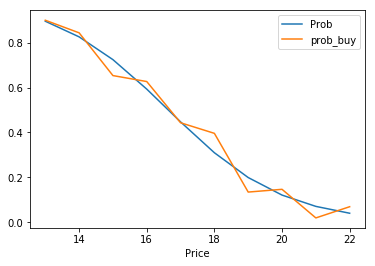

In [10]:
predicted_prob.groupby('Price').first().plot() # how well did our model fit?

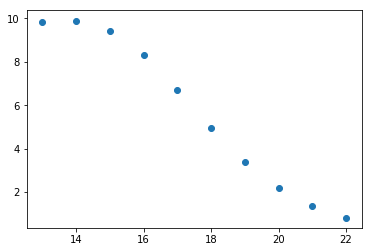

In [11]:
# Expected weighted profits
c_m = 2
predicted_prob['prof_weight'] = predicted_prob.apply(lambda x: (x['Price']-c_m)*x['Prob'], axis = 1)
plt.scatter(predicted_prob.Price, predicted_prob.prof_weight)